In [ ]:
#### Cargamos las librerias ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from imblearn.over_sampling import SMOTE

#metricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Cargando google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargar datos
datos = '/content/drive/MyDrive/05. Uniandes/05. Ciclo 05/01. No supervisado/00. Proyecto/01. Datos/SECOP-Contratos.csv'
df = pd.read_csv(datos)

<ipython-input-3-574e83c806d3>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datos)


In [ ]:
#iniciamos el descriptivo
descripcion=df.describe(include="all")
print(descripcion)
print(df.columns)

                                    Nombre Entidad   Nit Entidad  \
count                                      2331179  2.331179e+06   
unique                                        3797           NaN   
top     Secretaría Distrital de Integración Social           NaN   
freq                                         49468           NaN   
mean                                           NaN  1.665271e+09   
std                                            NaN  2.372196e+09   
min                                            NaN  0.000000e+00   
25%                                            NaN  8.901020e+08   
50%                                            NaN  8.922800e+08   
75%                                            NaN  9.000055e+08   
max                                            NaN  9.016290e+09   

                      Departamento       Ciudad              Localización  \
count                      2331179      2331179                   2331179   
unique                       

In [ ]:
df.head(20)

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,...,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad,Fecha Inicio Liquidacion,Fecha Fin Liquidacion,Codigo Proveedor,Objeto del Contrato
0,MUNICIPIO DE SAN JOSE DE CUCUTA,890501434,Norte de Santander,Cúcuta,"Colombia, Norte de Santander, Cúcuta",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.2727950,...,0,8000000,0,0,08/01/2022 12:00:00 AM,700445042,NaN,NaN,715948238,2022A33 Prestación de servicios como apoyo en ...
1,SENA REGIONAL NARIÑO Grupo de Apoyo Administra...,899999034,Nariño,Pasto,"Colombia, Nariño , Pasto",Nacional,Trabajo,Ejecutivo,Descentralizada,CO1.BDOS.1099809,...,0,0,0,0,09/28/2022 12:00:00 AM,704155043,NaN,NaN,705901759,Prestar de servicios personales como instructo...
2,SUBCUENTA PARA LA ADMON DE LOS RECURSOS Y MANE...,901037393,Meta,No Definido,"Colombia, Meta",Territorial,Ambiente y Desarrollo Sostenible,Ejecutivo,Centralizada,CO1.BDOS.307836,...,0,0,0,0,10/18/2019 12:00:00 AM,703415323,2018-12-18 05:00:00,2020-12-18 05:00:00,703048033,Prestación de servicios técnicos y de apoyo a ...
3,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE,830115395,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,No Definido,CO1.BDOS.3929835,...,0,0,0,0,NaN,700209018,NaN,NaN,UNSPECIFIED,NaN
4,ALCALDIA DISTRITAL BARRANCABERMEJA,890201900,Santander,No Definido,"Colombia, Santander",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.757521,...,0,0,0,0,10/30/2019 12:00:00 AM,702270372,NaN,NaN,702943457,PRESTACIÓN DE SERVICIOS PROFESIONALES COMO CON...
5,DEPARTAMENTO ADMINISTRATIVO DE LA FUNCIÓN PÚBL...,899999020,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.286374,...,0,0,0,0,09/06/2018 12:00:00 AM,700356033,NaN,NaN,700541030,Prestar servicios profesionales en la Oficina ...
6,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.777552,...,0,0,0,0,12/28/2019 12:00:00 AM,702486788,NaN,NaN,704832823,Prestar Servicos profesionales a la gestión ad...
7,ESCUELA TECNOLÓGICA INSTITUTO TÉCNICO CENTRAL,860523694,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Educación Nacional,Ejecutivo,Descentralizada,CO1.BDOS.2280721,...,0,0,0,0,10/15/2021 12:00:00 AM,700964026,NaN,NaN,715138236,PRESTACIÓN DE SERVICIOS PARA APOYAR LAS ACTIVI...
8,CAMARA DE REPRESENTANTES,899999098,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,No aplica/No pertenece,Legislativo,Centralizada,CO1.BDOS.1533556,...,0,0,0,0,06/10/2021 12:00:00 AM,701337164,NaN,NaN,711584862,PRESTACIÓN DE SERVICIOS DE APOYO A LA GESTIÓN ...
9,ALCALDIA MUNICIPAL LA VIRGINIA RISARALDA,891480027,Risaralda,La Virginia,"Colombia, Risaralda , La Virginia",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.2580178,...,0,0,0,0,07/28/2022 12:00:00 AM,706570116,NaN,NaN,714121274,DISEÑAR ESTRATEGIAS PARA LA FORMACIÓN EN EL TR...


In [ ]:
#Conociendo las columnas
df.shape
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331179 entries, 0 to 2331178
Data columns (total 71 columns):
 #   Column                                                              Dtype 
---  ------                                                              ----- 
 0   Nombre Entidad                                                      object
 1   Nit Entidad                                                         int64 
 2   Departamento                                                        object
 3   Ciudad                                                              object
 4   Localización                                                        object
 5   Orden                                                               object
 6   Sector                                                              object
 7   Rama                                                                object
 8   Entidad Centralizada                                                object
 9   Pr

In [ ]:
# Creamos un nuevo dataset con columnas depuradas
dfD = df.loc[:, ~df.columns.isin(['Nombre Entidad','Nit Entidad','Ciudad','Localización','Anno BPIN','ID Contrato','Fecha Inicio Liquidacion','Fecha de Firma','Reversion','Proceso de Compra','Referencia del Contrato','Codigo de Categoria Principal','Descripcion del Proceso','TipoDocProveedor','Codigo Proveedor','Documento Proveedor','Proveedor Adjudicado','Nombre Representante Legal','Nacionalidad Representante Legal','Tipo de Identificación Representante Legal','Identificación Representante Legal','Género Representante Legal','URLProceso','Puntos del Acuerdo','Fecha Fin Liquidacion','Pilares del Acuerdo','Condiciones de Entrega','Estado BPIN','Código BPIN','Codigo Entidad','Obligación Ambiental','Obligaciones Postconsumo','Justificacion Modalidad de Contratacion','Saldo CDP','Saldo Vigencia','EsPostConflicto','Presupuesto General de la Nacion – PGN','Sistema General de Participaciones','Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)','Recursos de Credito','Recursos Propios','Ultima Actualizacion','Valor Amortizado','Origen de los Recursos','Entidad Centralizada', 'Objeto del Contrato'])]
dfD.shape
dfD.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331179 entries, 0 to 2331178
Data columns (total 24 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Departamento                     object
 1   Orden                            object
 2   Sector                           object
 3   Rama                             object
 4   Estado Contrato                  object
 5   Tipo de Contrato                 object
 6   Modalidad de Contratacion        object
 7   Fecha de Inicio del Contrato     object
 8   Fecha de Fin del Contrato        object
 9   Fecha de Inicio de Ejecucion     object
 10  Fecha de Fin de Ejecucion        object
 11  Es Grupo                         object
 12  Es Pyme                          object
 13  Habilita Pago Adelantado         object
 14  Liquidación                      object
 15  Valor del Contrato               int64 
 16  Valor de pago adelantado         int64 
 17  Valor Facturado            

In [ ]:
dfD.head()

,Departamento,Orden,Sector,Rama,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Fecha de Inicio de Ejecucion,...,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Destino Gasto,Dias Adicionados
0,Norte de Santander,Territorial,Servicio Público,Ejecutivo,Modificado,Prestación de servicios,Contratación directa,02/01/2022,06/30/2022,NaN,...,No,8000000,0,8000000,3200000,4800000,0,8000000,Inversión,0
1,Nariño,Nacional,Trabajo,Ejecutivo,Modificado,Prestación de servicios,Contratación directa,02/10/2020,12/11/2020,02/10/2020,...,No,34730000,0,34723675,1265000,33465000,0,34730000,Inversión,5
2,Meta,Territorial,Ambiente y Desarrollo Sostenible,Ejecutivo,terminado,Prestación de servicios,Contratación directa,01/18/2018,12/17/2018,01/18/2018,...,Si,19241739,0,0,19241739,0,0,4618017,Inversión,0
3,Distrito Capital de Bogotá,Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Borrador,Prestación de servicios,Contratación directa,NaN,12/27/2023,NaN,...,No,0,0,0,0,0,0,0,Inversión,0
4,Santander,Territorial,Servicio Público,Ejecutivo,Activo,Prestación de servicios,Contratación directa,02/21/2019,05/20/2019,02/21/2019,...,No,11700000,0,0,11700000,0,0,11700000,Inversión,0


In [ ]:
# Validamos valores nulos
dfD.isna().any()

Departamento                       False
Orden                              False
Sector                             False
Rama                               False
Estado Contrato                    False
Tipo de Contrato                   False
Modalidad de Contratacion          False
Fecha de Inicio del Contrato        True
Fecha de Fin del Contrato           True
Fecha de Inicio de Ejecucion        True
Fecha de Fin de Ejecucion           True
Es Grupo                           False
Es Pyme                            False
Habilita Pago Adelantado           False
Liquidación                        False
Valor del Contrato                 False
Valor de pago adelantado           False
Valor Facturado                    False
Valor Pendiente de Pago            False
Valor Pagado                       False
Valor Pendiente de Amortizacion    False
Valor Pendiente de Ejecucion       False
Destino Gasto                      False
Dias Adicionados                   False
dtype: bool

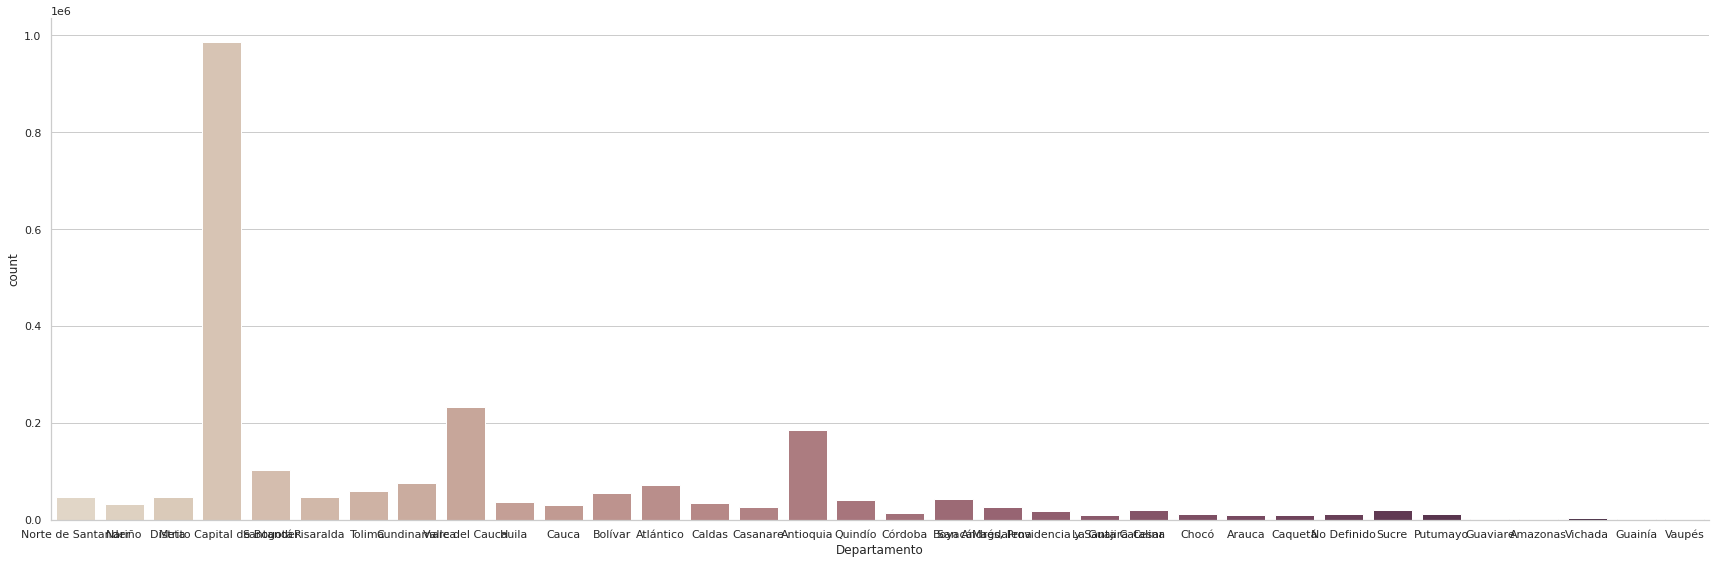

In [ ]:
#análisis por departamento
sns.set(style="whitegrid")
sns.catplot(x="Departamento", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfDep = dfD[['Departamento','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfDep.groupby(['Departamento']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Departamento,,,,
Amazonas,"163,830,791,819.00$","25,552,616,568.00$","21,144,252,464.00$","904,000,000.00$"
Antioquia,"3,678,101,848,453,294.00$","10,569,781,409,711.00$","9,610,995,889,194.00$","41,075,933,274.00$"
Arauca,"925,703,392,689.00$","323,423,592,319.00$","276,660,507,859.00$","670,793,037.00$"
Atlántico,"1,153,830,438,791,545.00$","3,193,422,537,797.00$","710,131,396,914.00$","12,391,439,428.00$"
Bolívar,"2,619,943,105,391,140.00$","1,160,673,694,240.00$","803,309,413,939.00$","51,198,524,019.00$"
Boyacá,"2,042,921,235,801,585.00$","561,319,574,905.00$","459,443,262,994.00$","28,581,552,886.00$"
Caldas,"737,363,460,433,560.00$","366,940,958,270.00$","274,511,086,977.00$","55,232,705,568.00$"
Caquetá,"466,742,493,612,397.00$","254,650,565,133.00$","213,019,860,958.00$","8,491,112,415.00$"
Casanare,"562,827,846,909,202.00$","227,831,499,324.00$","181,347,558,290.00$","7,849,998,055.00$"


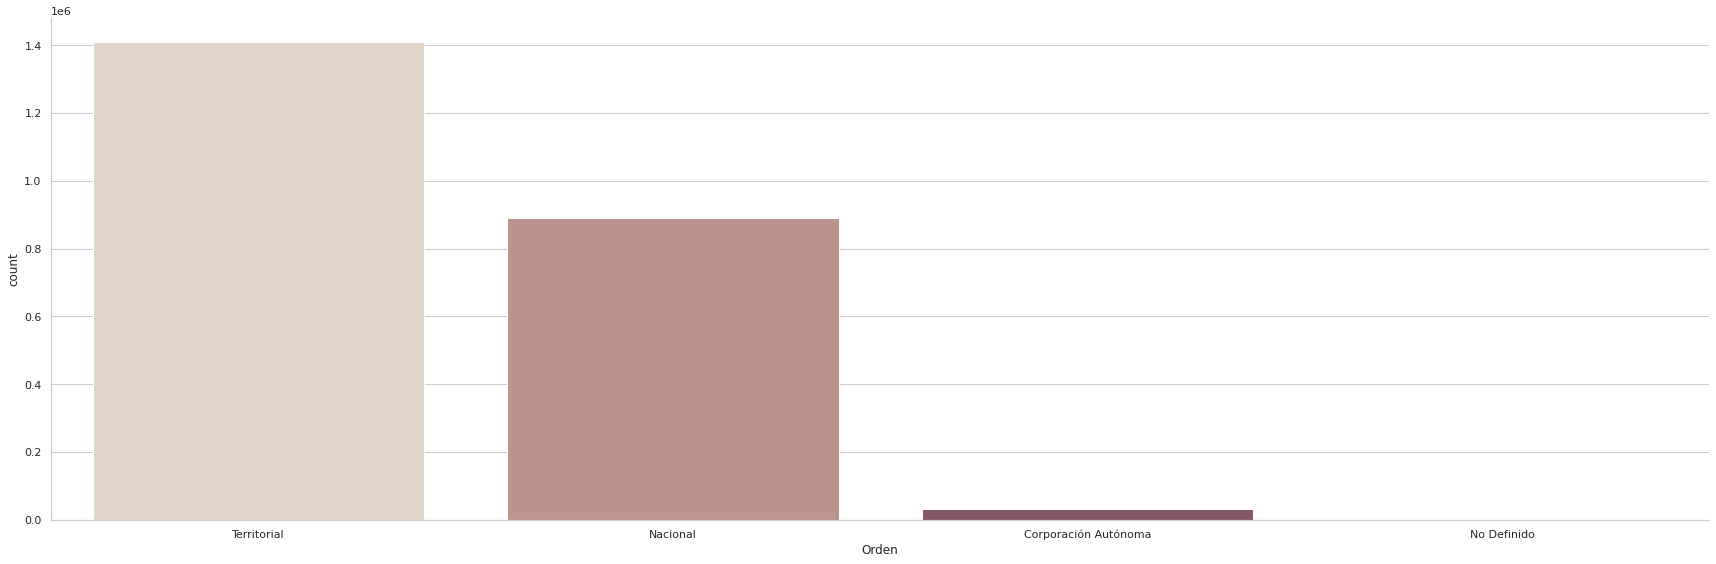

In [ ]:
#análisis por estado de contrato
sns.set(style="whitegrid")
sns.catplot(x="Orden", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfOrd = dfD[['Orden','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfOrd.groupby(['Orden']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum") )

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Orden,,,,
Corporación Autónoma,2471209892680514,1070755342347,893859517574,68004011146
Nacional,59385558984694296,33536426648270,26809475729367,389887693001
No Definido,164738498,42101387,38601387,0
Territorial,85059786768743200,33509753742475,24948264048096,847420004368


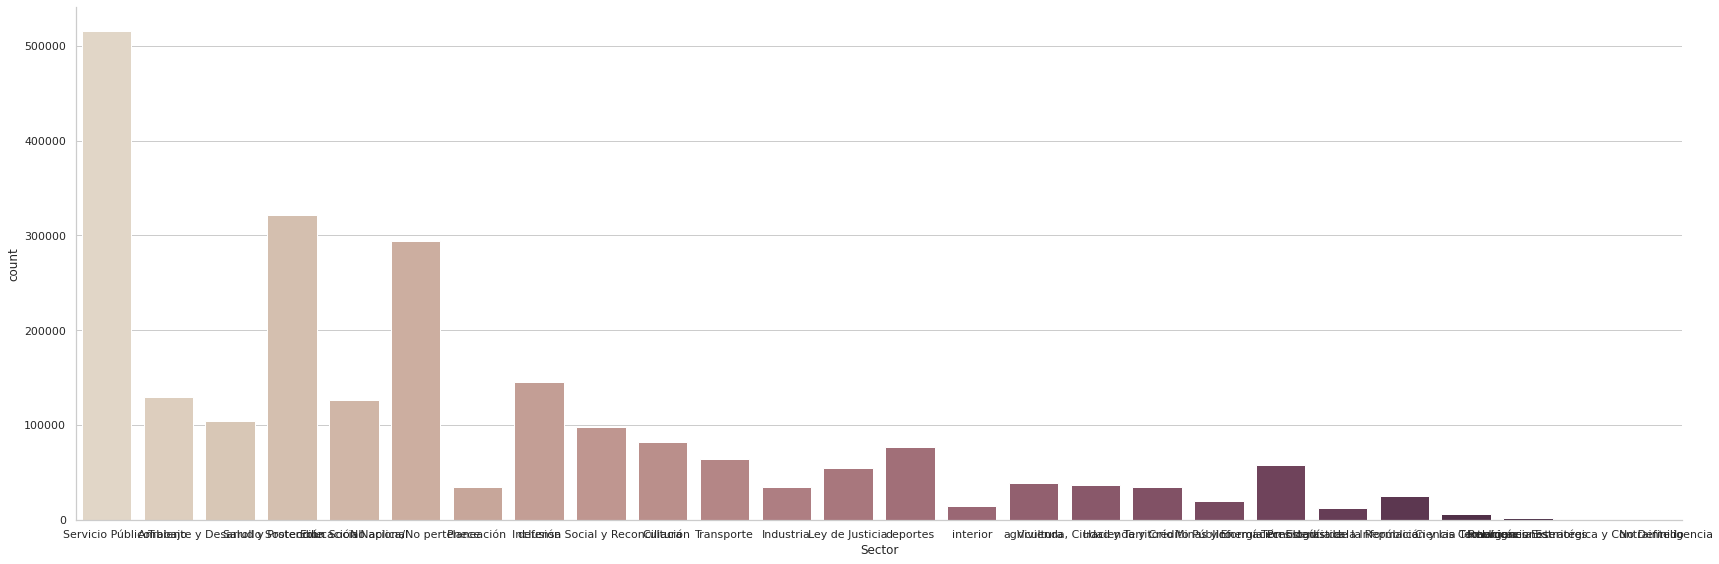

In [ ]:
#análisis por estado de sector
sns.set(style="whitegrid")
sns.catplot(x="Sector", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Sector','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfSec.groupby(['Sector']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Sector,,,,
Ambiente y Desarrollo Sostenible,"10,830,918,865,158,776.00$","2,229,608,978,560.00$","1,606,692,133,481.00$","86,345,976,689.00$"
Ciencia Tecnología,"692,680,925,458.00$","386,453,411,729.00$","278,603,846,618.00$","3,264,250,103.00$"
Cultura,"8,906,066,132,158,310.00$","1,929,112,561,627.00$","1,739,979,832,321.00$","22,865,910,985.00$"
Educación Nacional,"10,830,479,416,309,340.00$","2,678,476,506,848.00$","1,956,513,856,271.00$","33,036,658,737.00$"
Hacienda y Crédito Público,"288,657,366,757,873.00$","1,490,098,284,413.00$","1,227,687,260,262.00$","1,499,092,923.00$"
Inclusión Social y Reconciliación,"15,493,986,928,011,486.00$","2,066,312,568,663.00$","1,541,306,709,824.00$","1,331,722,902.00$"
Industria,"10,080,083,846,073,982.00$","847,231,935,051.00$","615,060,801,169.00$","14,852,916,290.00$"
Información Estadística,"1,946,561,468,458,438.00$","262,680,728,727.00$","140,860,450,486.00$","1,202,092,949.00$"
Inteligencia Estratégica y Contrainteligencia,"37,080,325,081.00$",0.00$,0.00$,0.00$


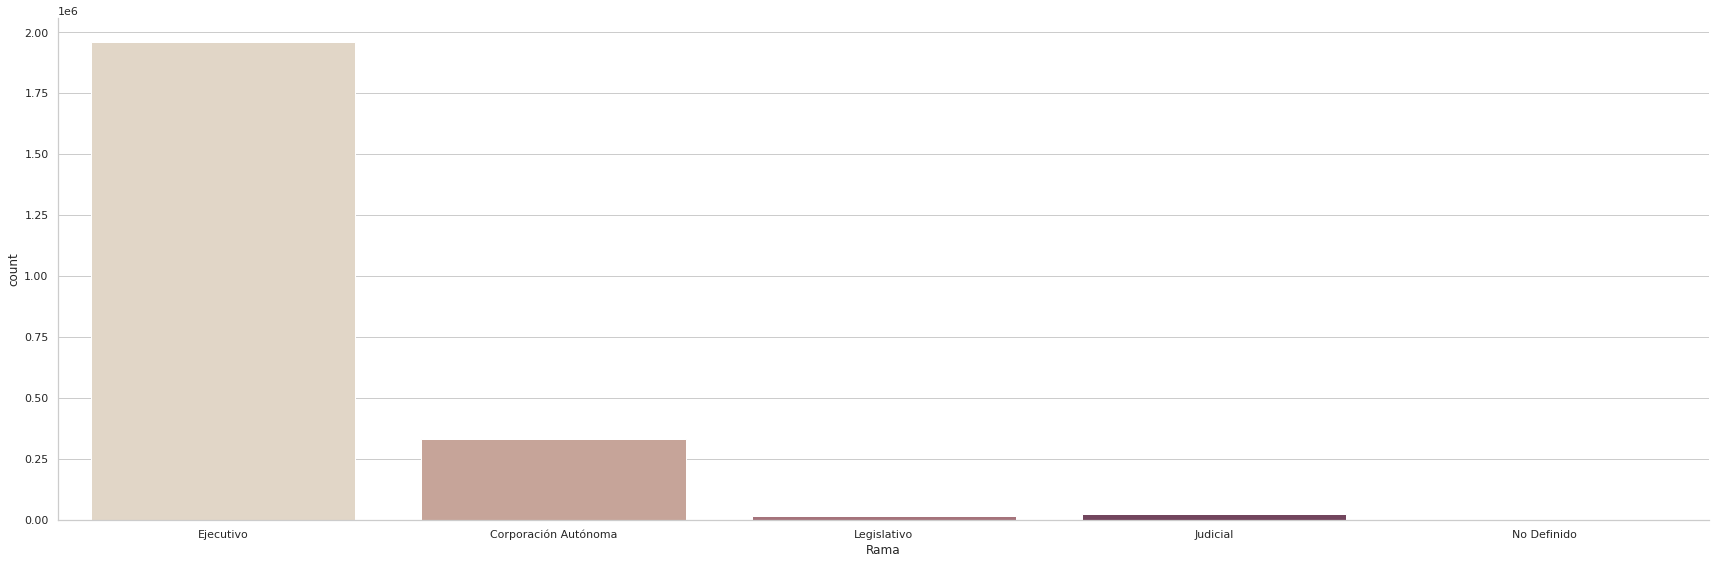

In [ ]:
#análisis por estado de sector
sns.set(style="whitegrid")
sns.catplot(x="Rama", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfRam = dfD[['Rama','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfRam.groupby(['Rama']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Rama,,,,
Corporación Autónoma,"30,789,585,211,796,832.00$","9,671,332,898,264.00$","7,866,967,421,622.00$","156,865,490,376.00$"
Ejecutivo,"115,494,988,585,728,368.00$","56,900,789,424,695.00$","43,825,755,778,958.00$","1,135,677,222,032.00$"
Judicial,"5,700,879,077,453.00$","1,186,383,457,749.00$","760,954,559,702.00$","12,061,938,137.00$"
Legislativo,"626,280,969,515,357.00$","358,429,952,384.00$","197,921,534,755.00$","707,057,970.00$"
No Definido,"164,738,498.00$","42,101,387.00$","38,601,387.00$",0.00$


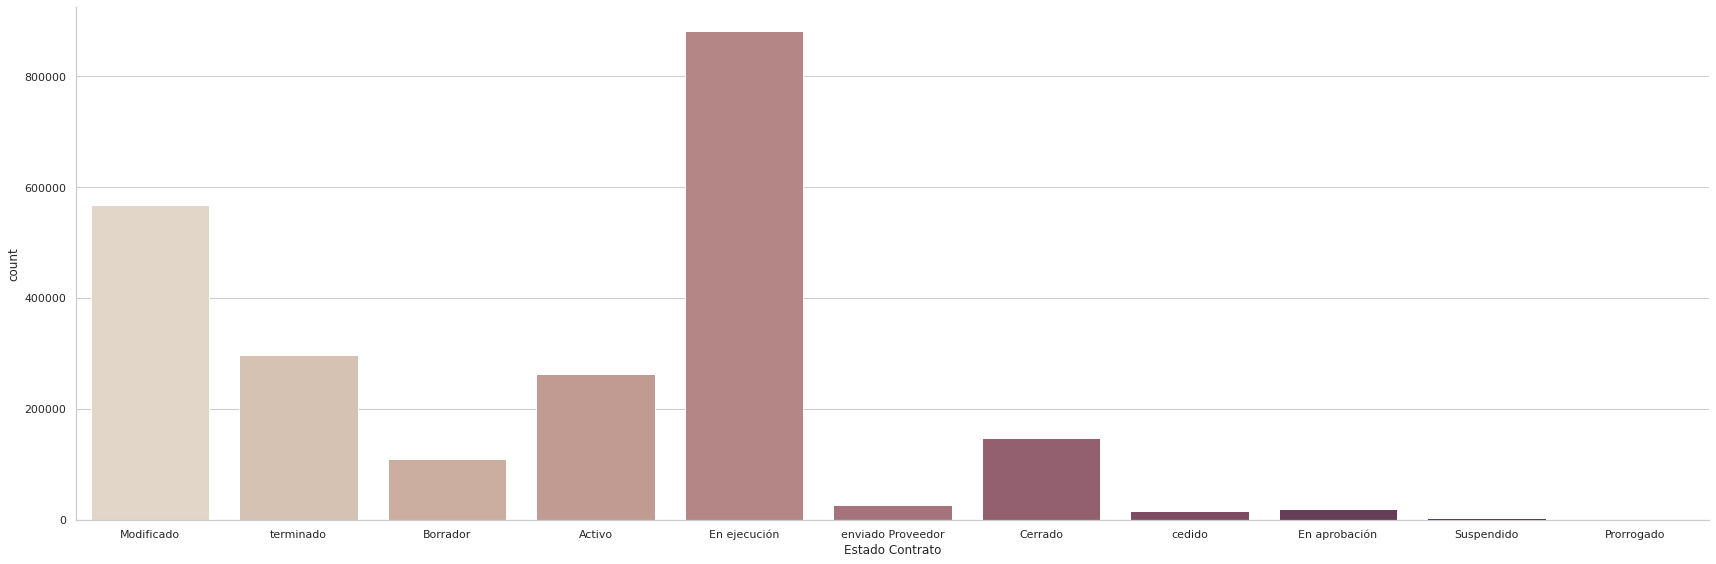

In [ ]:
#análisis por estado contrato
sns.set(style="whitegrid")
sns.catplot(x="Estado Contrato", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Estado Contrato','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Estado Contrato']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Estado Contrato,,,,,
Activo,"28,211,486,876,594.00$","2,301,505,776,759.00$","1,848,188,954,297.00$","26,312,987,200,859.00$","181,915,407,513.00$"
Borrador,"145,039,768,482,883,648.00$","408,384,784.00$","384,140,894.00$","29,266,269,439,603.00$","108,863,249,028.00$"
Cerrado,"7,523,498,972,605.00$","3,495,269,939,697.00$","3,494,278,679,377.00$","4,755,632,315,223.00$","9,850,206,154.00$"
En aprobación,"208,266,687,805,149.00$","143,912,251.00$","65,753,233.00$","3,206,943,156,991.00$","17,119,263,762.00$"
En ejecución,"201,104,330,945,400.00$","12,389,511,784,953.00$","8,097,271,048,128.00$","70,473,687,513,803.00$","233,661,505,640.00$"
Modificado,"190,546,423,854,139.00$","35,364,132,618,922.00$","26,279,082,509,685.00$","153,556,720,164,198.00$","569,682,564,727.00$"
Prorrogado,"5,401,851,511.00$","910,343,248.00$","644,411,834.00$","4,757,439,677.00$",0.00$
Suspendido,"4,072,759,429,119.00$","503,601,982,542.00$","292,003,599,608.00$","3,780,714,928,558.00$","44,673,937,856.00$"
cedido,"1,020,556,159,668.00$","331,731,063,410.00$","253,369,572,440.00$","822,305,378,517.00$","3,811,747,840.00$"


In [ ]:
dfSec = dfD[['Estado Contrato','Valor del Contrato']]
dfSec.groupby(['Estado Contrato']).agg(Cantidad=("Valor del Contrato", "count")).style.format("{:,.2f}")

,Cantidad
Estado Contrato,
Activo,"263,734.00"
Borrador,"109,079.00"
Cerrado,"147,477.00"
En aprobación,"19,113.00"
En ejecución,"881,131.00"
Modificado,"567,114.00"
Prorrogado,146.00
Suspendido,"3,336.00"
cedido,"16,418.00"


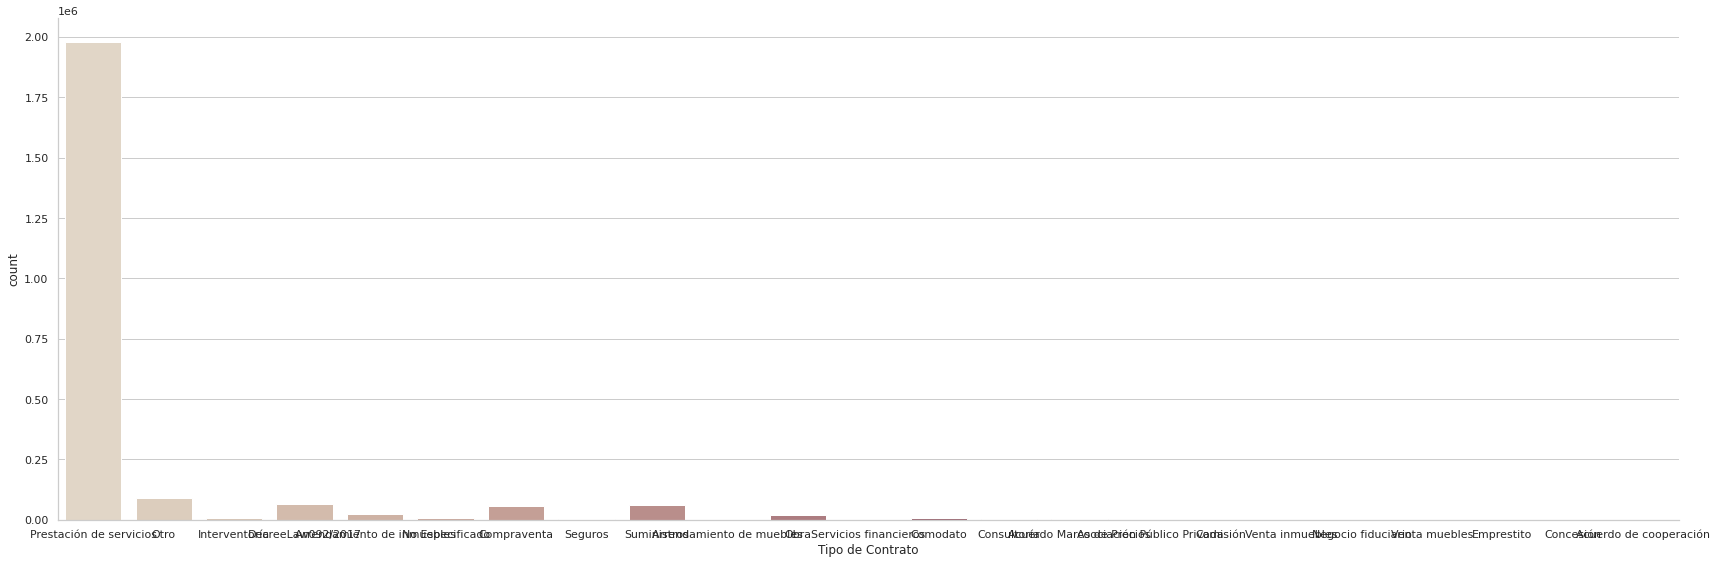

In [ ]:
#análisis por tipo de contrato
sns.set(style="whitegrid")
sns.catplot(x="Tipo de Contrato", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Tipo de Contrato','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Tipo de Contrato']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Tipo de Contrato,,,,,
Acuerdo Marco de Precios,"499,132,615,902.00$",0.00$,0.00$,"451,197,174,586.00$",0.00$
Acuerdo de cooperación,"30,522,611,513.00$","4,521,696,607.00$","4,227,074,472.00$","26,295,537,041.00$",0.00$
Arrendamiento de inmuebles,"6,423,968,825,697,925.00$","733,626,869,696.00$","510,596,247,337.00$","3,616,520,168,149.00$","94,262,966.00$"
Arrendamiento de muebles,"631,600,409,081.00$","255,086,716,349.00$","215,540,660,577.00$","455,189,849,300.00$",0.00$
Asociación Público Privada,"813,087,298,476.00$","4,163,297,307.00$","1,700,558,881.00$","810,796,639,595.00$","5,020,483,191.00$"
Comisión,"838,827,039,344.00$","3,363,880,768.00$","2,063,507,639.00$","833,690,324,787.00$",0.00$
Comodato,"507,090,567,399.00$","109,706,709.00$",0.00$,"506,914,748,469.00$",0.00$
Compraventa,"6,173,373,568,098,530.00$","3,231,183,865,025.00$","2,438,451,062,805.00$","13,093,317,396,665.00$","53,605,875,402.00$"
Concesión,"10,510,570,101,109.00$","950,919,438,026.00$","950,898,800,527.00$","5,940,020,847,974.00$",0.00$


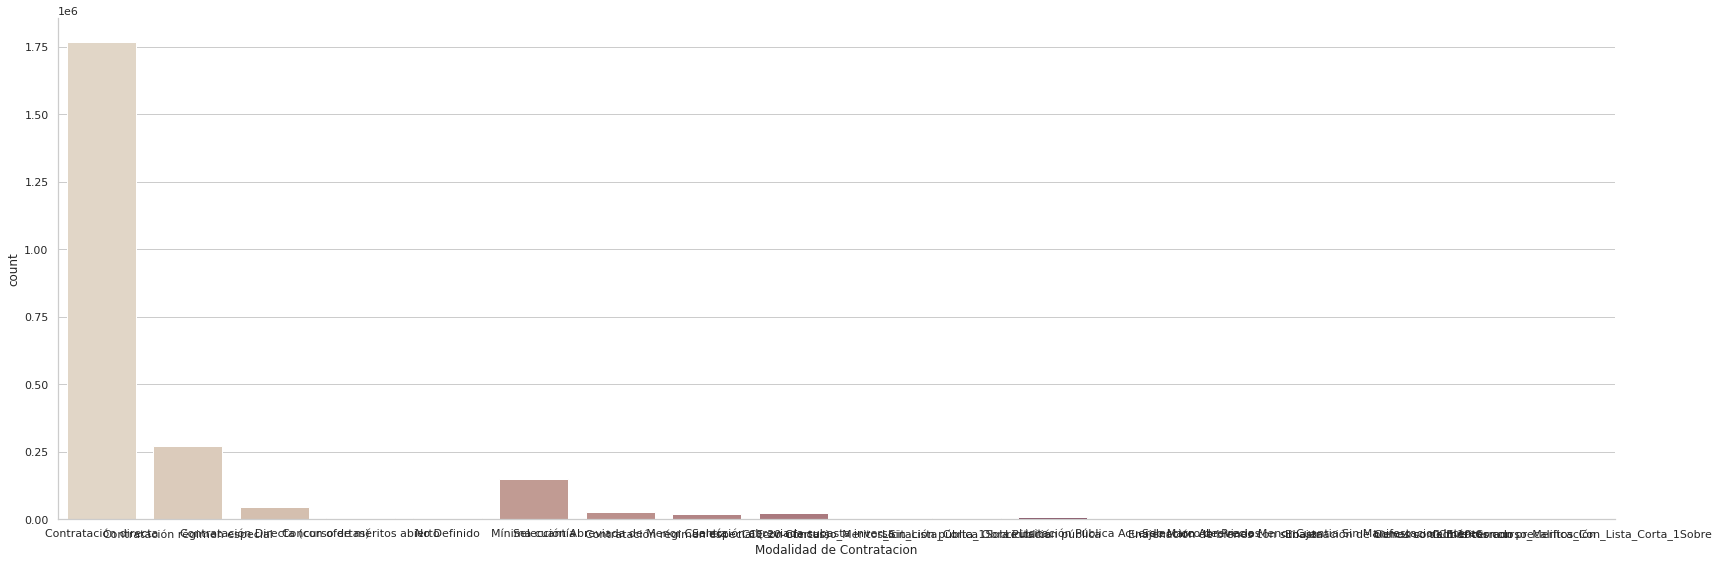

In [ ]:
#análisis por modalidad de contratacion
sns.set(style="whitegrid")
sns.catplot(x="Modalidad de Contratacion", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Modalidad de Contratacion','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Modalidad de Contratacion']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Modalidad de Contratacion,,,,,
CCE-19-Concurso_Meritos_Con_Lista_Corta_1Sobre,"4,171,063,384.00$",0.00$,0.00$,"4,171,063,384.00$",0.00$
CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre,"2,857,695,471,783.00$","191,887,865,095.00$","120,603,992,082.00$","2,736,898,120,721.00$","6,300,390,250.00$"
Concurso de méritos abierto,"6,535,272,877,470.00$","801,111,983,615.00$","677,102,858,679.00$","5,851,579,700,738.00$","12,486,264,562.00$"
Concurso de méritos con precalificación,"894,880,000.00$",0.00$,0.00$,"894,880,000.00$",0.00$
Contratación Directa (con ofertas),"53,567,875,940,193.00$","7,955,318,165,087.00$","6,531,832,205,866.00$","36,857,935,206,178.00$","105,403,953,824.00$"
Contratación directa,"127,997,476,086,876,096.00$","27,809,569,056,152.00$","21,104,879,872,316.00$","95,888,056,218,008.00$","108,528,271,098.00$"
Contratación régimen especial,"9,847,410,909,630,900.00$","3,740,910,639,116.00$","2,959,489,157,704.00$","47,525,000,059,419.00$","126,260,396,533.00$"
Contratación régimen especial (con ofertas),"2,701,691,119,436,139.00$","2,193,833,869,607.00$","1,731,109,389,456.00$","22,661,040,917,286.00$","100,260,247,778.00$"
Enajenación de bienes con sobre cerrado,"198,723,685,870.00$",0.00$,0.00$,"198,607,367,789.00$",0.00$


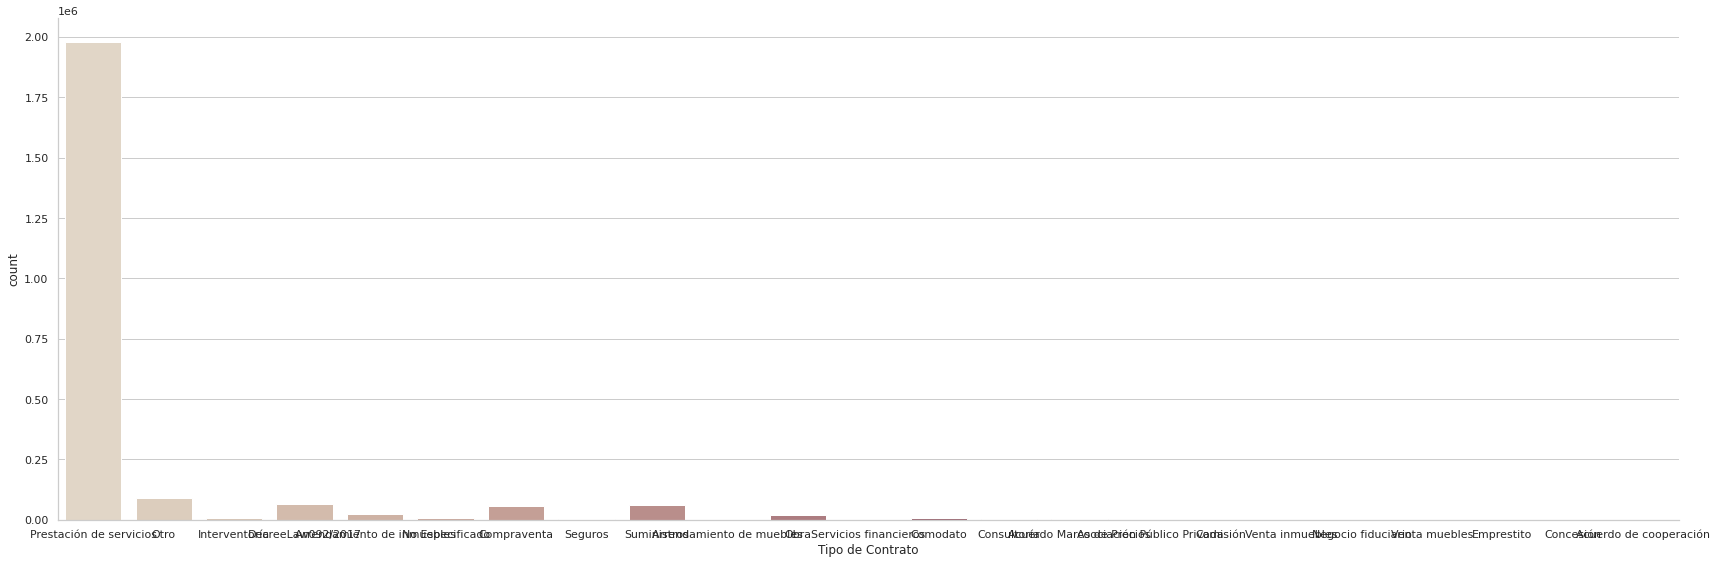

In [ ]:
#análisis por estado de rama
sns.set(style="whitegrid")
sns.catplot(x="Tipo de Contrato", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Tipo de Contrato','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Tipo de Contrato']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Tipo de Contrato,,,,,
Acuerdo Marco de Precios,"499,132,615,902.00$",0.00$,0.00$,"451,197,174,586.00$",0.00$
Acuerdo de cooperación,"30,522,611,513.00$","4,521,696,607.00$","4,227,074,472.00$","26,295,537,041.00$",0.00$
Arrendamiento de inmuebles,"6,423,968,825,697,925.00$","733,626,869,696.00$","510,596,247,337.00$","3,616,520,168,149.00$","94,262,966.00$"
Arrendamiento de muebles,"631,600,409,081.00$","255,086,716,349.00$","215,540,660,577.00$","455,189,849,300.00$",0.00$
Asociación Público Privada,"813,087,298,476.00$","4,163,297,307.00$","1,700,558,881.00$","810,796,639,595.00$","5,020,483,191.00$"
Comisión,"838,827,039,344.00$","3,363,880,768.00$","2,063,507,639.00$","833,690,324,787.00$",0.00$
Comodato,"507,090,567,399.00$","109,706,709.00$",0.00$,"506,914,748,469.00$",0.00$
Compraventa,"6,173,373,568,098,530.00$","3,231,183,865,025.00$","2,438,451,062,805.00$","13,093,317,396,665.00$","53,605,875,402.00$"
Concesión,"10,510,570,101,109.00$","950,919,438,026.00$","950,898,800,527.00$","5,940,020,847,974.00$",0.00$


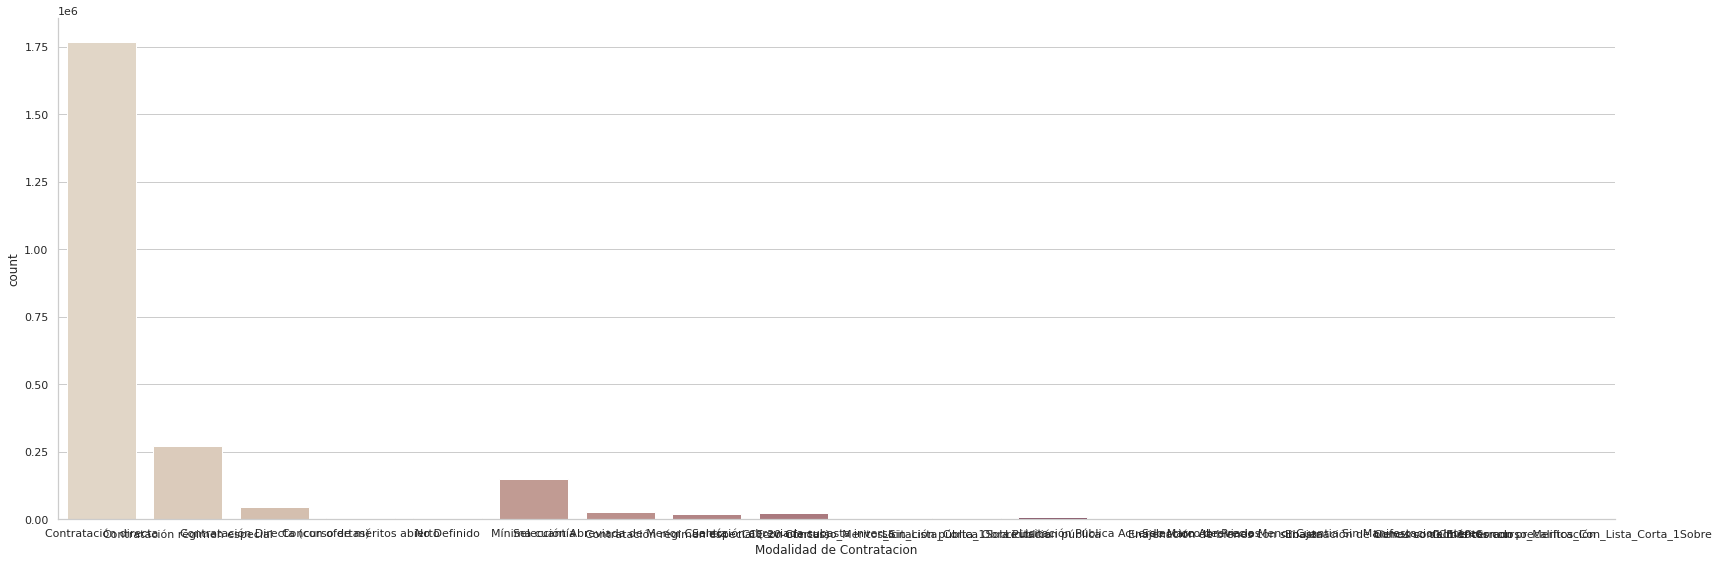

In [ ]:
#análisis por modalidad de contratacion
sns.set(style="whitegrid")
sns.catplot(x="Modalidad de Contratacion", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfMoC = dfD[['Modalidad de Contratacion','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfMoC.groupby(['Modalidad de Contratacion']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Modalidad de Contratacion,,,,
CCE-19-Concurso_Meritos_Con_Lista_Corta_1Sobre,"4,171,063,384.00$",0.00$,0.00$,0.00$
CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre,"2,857,695,471,783.00$","191,887,865,095.00$","120,603,992,082.00$","6,300,390,250.00$"
Concurso de méritos abierto,"6,535,272,877,470.00$","801,111,983,615.00$","677,102,858,679.00$","12,486,264,562.00$"
Concurso de méritos con precalificación,"894,880,000.00$",0.00$,0.00$,0.00$
Contratación Directa (con ofertas),"53,567,875,940,193.00$","7,955,318,165,087.00$","6,531,832,205,866.00$","105,403,953,824.00$"
Contratación directa,"127,997,476,086,876,096.00$","27,809,569,056,152.00$","21,104,879,872,316.00$","108,528,271,098.00$"
Contratación régimen especial,"9,847,410,909,630,900.00$","3,740,910,639,116.00$","2,959,489,157,704.00$","126,260,396,533.00$"
Contratación régimen especial (con ofertas),"2,701,691,119,436,139.00$","2,193,833,869,607.00$","1,731,109,389,456.00$","100,260,247,778.00$"
Enajenación de bienes con sobre cerrado,"198,723,685,870.00$",0.00$,0.00$,0.00$


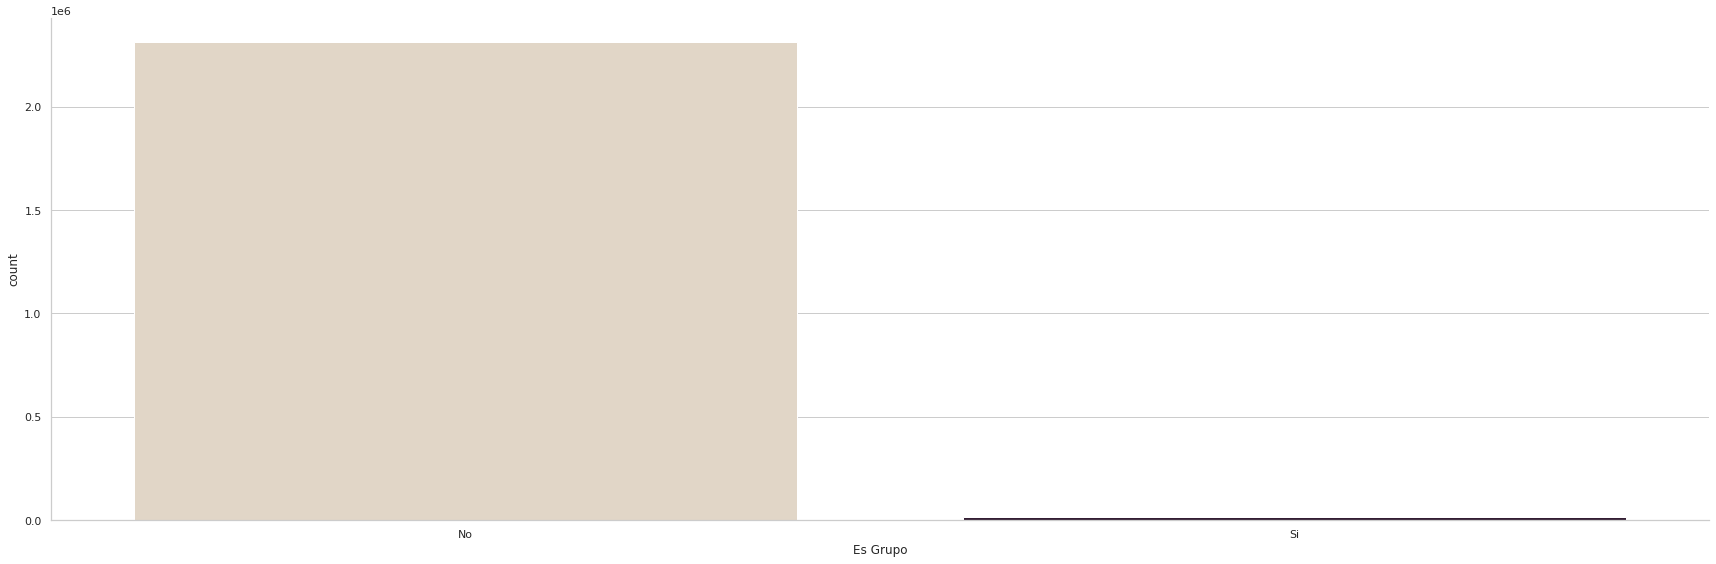

In [ ]:
#análisis por grupo
sns.set(style="whitegrid")
sns.catplot(x="Es Grupo", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Es Grupo','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Es Grupo']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Es Grupo,,,,,
No,"146,821,936,713,014,848.00$","53,707,935,319,404.00$","41,377,132,539,767.00$","249,001,522,226,708.00$","629,018,142,642.00$"
Si,"94,619,097,841,653.00$","14,409,042,515,075.00$","11,274,505,356,657.00$","77,714,057,487,336.00$","676,293,565,873.00$"


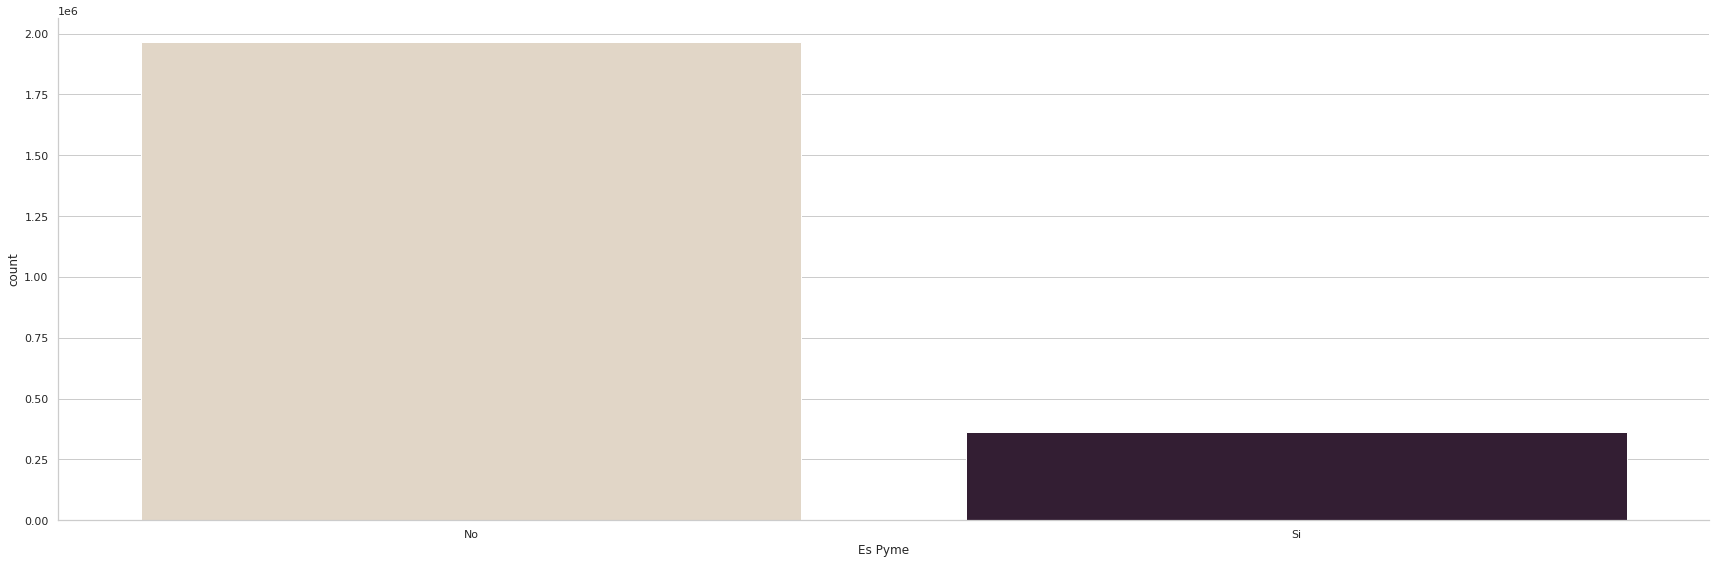

In [ ]:
#análisis por pyme
sns.set(style="whitegrid")
sns.catplot(x="Es Pyme", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Es Pyme','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Es Pyme']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Es Pyme,,,,,
No,"132,984,644,963,232,528.00$","52,851,975,299,402.00$","40,853,238,664,036.00$","266,135,741,952,596.00$","946,171,604,693.00$"
Si,"13,931,910,847,623,980.00$","15,265,002,535,077.00$","11,798,399,232,388.00$","60,579,837,761,448.00$","359,140,103,822.00$"


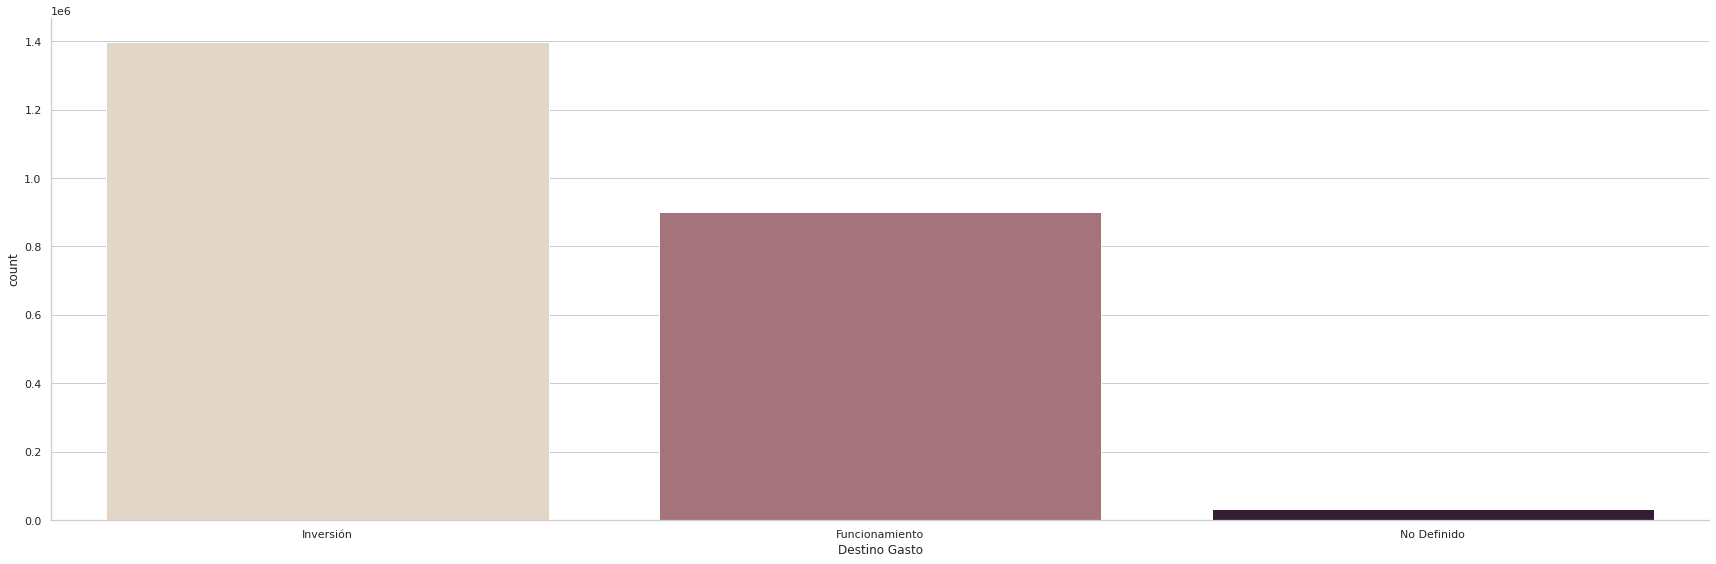

In [ ]:
#análisis por destino gasto
sns.set(style="whitegrid")
sns.catplot(x="Destino Gasto", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Destino Gasto','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Destino Gasto']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Destino Gasto,,,,,
Funcionamiento,"55,638,941,720,955,800.00$","23,870,648,499,635.00$","18,474,326,151,256.00$","99,872,710,166,635.00$","150,303,937,195.00$"
Inversión,"89,940,004,989,771,664.00$","43,846,391,814,490.00$","33,866,089,720,561.00$","220,736,052,285,764.00$","1,149,568,633,877.00$"
No Definido,"1,337,609,100,129,042.00$","399,937,520,354.00$","311,222,024,607.00$","6,106,817,261,645.00$","5,439,137,443.00$"


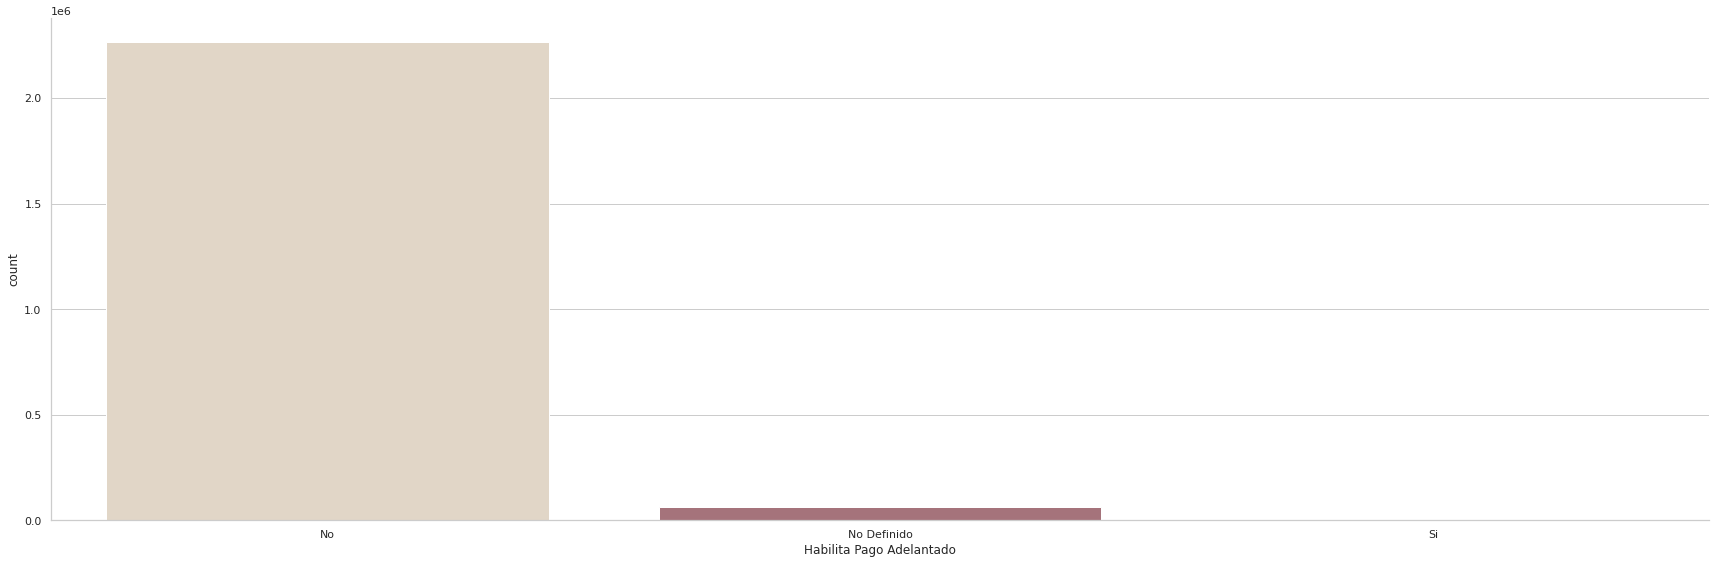

In [ ]:
#análisis por habilita pago adelantado
sns.set(style="whitegrid")
sns.catplot(x="Habilita Pago Adelantado", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Habilita Pago Adelantado','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Habilita Pago Adelantado']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Habilita Pago Adelantado,,,,,
No,"144,866,060,511,188,416.00$","67,704,043,764,751.00$","52,422,601,595,165.00$","309,658,988,663,823.00$","314,007,536,157.00$"
No Definido,"2,047,391,387,066,651.00$","317,102,733.00$","227,548,565.00$","14,191,931,590,933.00$","32,314,516,801.00$"
Si,"3,103,912,601,427.00$","412,616,966,995.00$","228,808,752,694.00$","2,864,659,459,288.00$","958,989,655,557.00$"


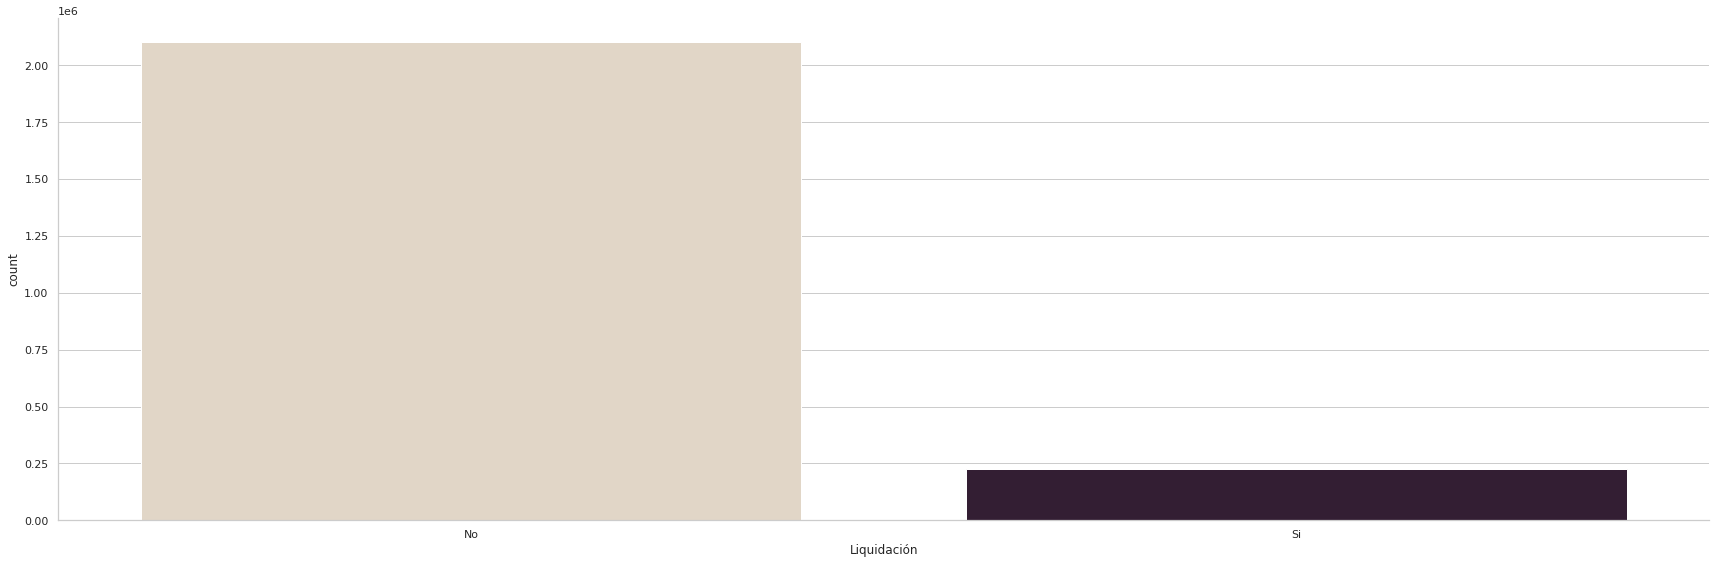

In [ ]:
#análisis por liquidacion
sns.set(style="whitegrid")
sns.catplot(x="Liquidación", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Liquidación','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Liquidación']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Liquidación,,,,,
No,"141,669,344,820,159,216.00$","37,882,929,654,225.00$","28,010,651,627,847.00$","201,537,940,037,333.00$","600,452,536,213.00$"
Si,"5,247,210,990,697,295.00$","30,234,048,180,254.00$","24,640,986,268,577.00$","125,177,639,676,711.00$","704,859,172,302.00$"


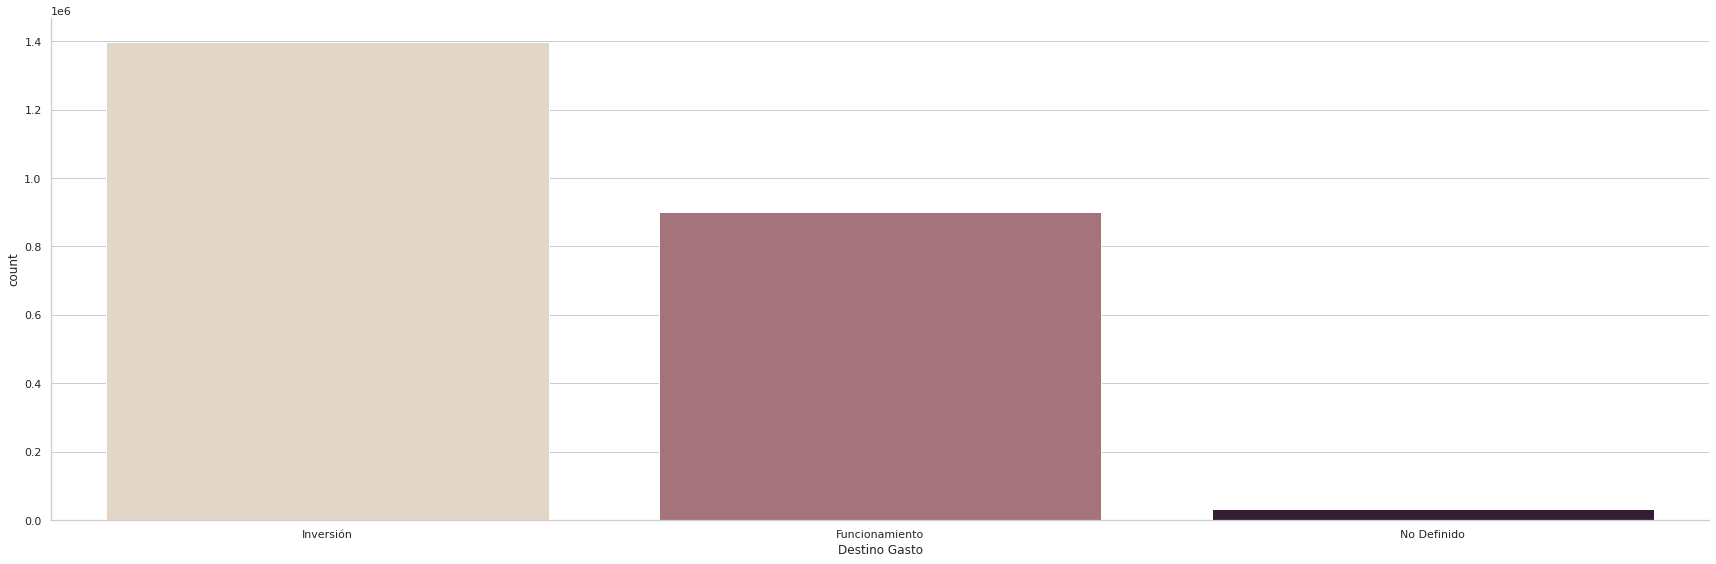

In [ ]:
#análisis por Destino Gasto
sns.set(style="whitegrid")
sns.catplot(x="Destino Gasto", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [ ]:
dfSec = dfD[['Destino Gasto','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Destino Gasto']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Destino Gasto,,,,,
Funcionamiento,"55,638,941,720,955,800.00$","23,870,648,499,635.00$","18,474,326,151,256.00$","99,872,710,166,635.00$","150,303,937,195.00$"
Inversión,"89,940,004,989,771,664.00$","43,846,391,814,490.00$","33,866,089,720,561.00$","220,736,052,285,764.00$","1,149,568,633,877.00$"
No Definido,"1,337,609,100,129,042.00$","399,937,520,354.00$","311,222,024,607.00$","6,106,817,261,645.00$","5,439,137,443.00$"


{'whiskers': [<matplotlib.lines.Line2D at 0x7f054ebd85b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f054ebd89d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f054ebd8310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f054ebd8f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f059dee21f0>],
 'means': []}

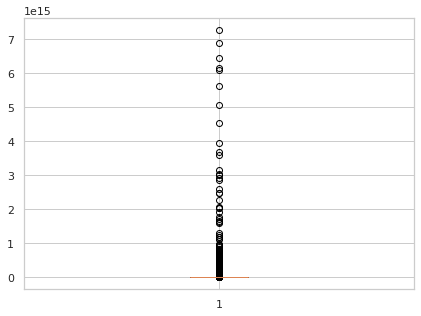

In [ ]:
# Gráfico de boxplot campo ValorContrato
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor del Contrato'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05a37e8d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05a37f72e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05a37e8be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05a37f7820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05a37f7ac0>],
 'means': []}

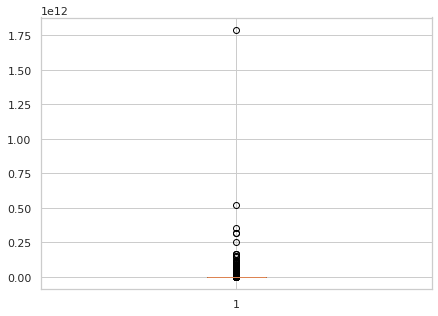

In [ ]:
# Gráfico de boxplot campo Valor Facturado
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Facturado'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05a3756ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05a3764220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05a3756a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05a3764760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05a3764a00>],
 'means': []}

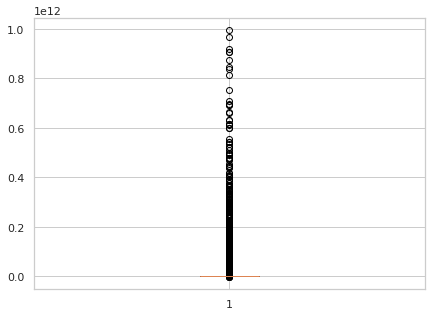

In [ ]:
# Gráfico de boxplot campo Valor pendiente de pago
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pendiente de Pago'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05a373e850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05a373ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05a373e6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05a374c310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05a374c5b0>],
 'means': []}

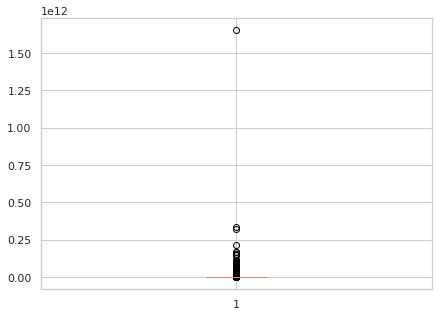

In [ ]:
# Gráfico de boxplot campo Valor pagado
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pagado'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05a369f070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05a36ac730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05a36ac070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05a36acc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05a36acf10>],
 'means': []}

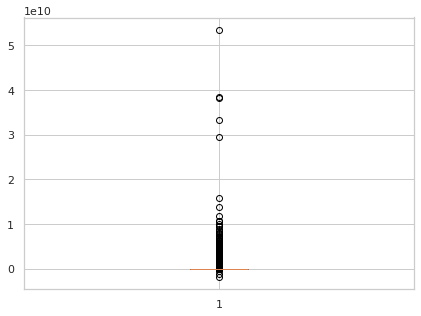

In [ ]:
# Gráfico de boxplot campo Valor pendiente de amortizacion
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pendiente de Amortizacion'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05a368b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05a368bf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05a368b730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05a3618490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05a3618730>],
 'means': []}

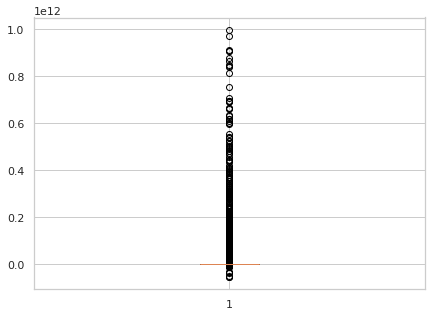

In [ ]:
# Gráfico de boxplot campo Valor pendiente de ejecucion
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pendiente de Ejecucion'])

In [ ]:
dfDeG = df[['Dias Adicionados','Departamento']]
dfDeG.groupby(['Dias Adicionados']).agg(Cantidad=("Departamento", "count"))

,Cantidad
Dias Adicionados,
0,1989074
1,2933
2,2331
3,2340
4,2666
...,...
3652,6
3743,1
3836,1


In [ ]:
# Validamos valores nulos
dfD.isna().any()

Departamento                       False
Orden                              False
Sector                             False
Rama                               False
Estado Contrato                    False
Tipo de Contrato                   False
Modalidad de Contratacion          False
Fecha de Inicio del Contrato        True
Fecha de Fin del Contrato           True
Fecha de Inicio de Ejecucion        True
Fecha de Fin de Ejecucion           True
Es Grupo                           False
Es Pyme                            False
Habilita Pago Adelantado           False
Liquidación                        False
Valor del Contrato                 False
Valor de pago adelantado           False
Valor Facturado                    False
Valor Pendiente de Pago            False
Valor Pagado                       False
Valor Pendiente de Amortizacion    False
Valor Pendiente de Ejecucion       False
Destino Gasto                      False
Dias Adicionados                   False
dtype: bool

In [ ]:
#eliminados los contratos en estado terminado
index_names = dfD[(dfD['Estado Contrato'] == "terminado" ) ].index
dfD.drop(index_names, inplace = True)

<ipython-input-49-ed5598ed76dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfD.drop(index_names, inplace = True)


In [ ]:
dfSec = dfD[['Estado Contrato','Valor del Contrato']]
dfSec.groupby(['Estado Contrato']).agg(Cantidad=("Valor del Contrato", "count")).style.format("{:,.2f}")

,Cantidad
Estado Contrato,
Activo,"263,734.00"
Borrador,"109,079.00"
Cerrado,"147,477.00"
En aprobación,"19,113.00"
En ejecución,"881,131.00"
Modificado,"567,114.00"
Prorrogado,146.00
Suspendido,"3,336.00"
cedido,"16,418.00"


In [ ]:
# eliminamos las columnas de fecha
dfD=dfD.drop(["Fecha de Inicio del Contrato","Fecha de Fin del Contrato","Fecha de Inicio de Ejecucion","Fecha de Fin de Ejecucion"],axis=1)

In [ ]:
#se realiza numeralizacion de las variables categoricas
dfD["Departamento"].replace({"Amazonas":"1","Antioquia":"2","Arauca":3,"Atlántico":"4","Bolívar":"5","Boyacá":6,"Caldas":"7","Caquetá":"8","Casanare":9,"Cauca":"10","Cesar":"11","Chocó":12,"Córdoba":"13","Cundinamarca":"14","Distrito Capital de Bogotá":15,"Guainía":"16","Guaviare":"17","Huila":18,"La Guajira":"19","Magdalena":"20","Meta":21,"Nariño":22,"Norte de Santander":"23","Putumayo":"24","Quindío":25,"Risaralda":"26","San Andrés, Providencia y Santa Catalina":27,"Santander":28,"Sucre":"29","Tolima":"30","Valle del Cauca":31,"Vaupés":"32","Vichada":"33","No Definido":0}, inplace = True)
dfD["Orden"].replace({"Nacional":"1","Territorial":"2","Corporación Autónoma":3,"No Definido":"0"}, inplace = True)
dfD["Sector"].replace({"agricultura":"1","Ambiente y Desarrollo Sostenible":"2","Ciencia Tecnología":3,"Cultura":"4","defensa":"5","deportes":6,"Educación Nacional":"7","Hacienda y Crédito Público":"8","Inclusión Social y Reconciliación":9,"Industria":"10","Información Estadística":"11","Inteligencia Estratégica y Contrainteligencia":12,"interior":"13","Ley de Justicia":"14","Minas y Energía":15,"No aplica/No pertenece":"0","Planeación":"16","Presidencia de la República":17,"Relaciones Exteriores":"18","Salud y Protección Social":"19","Servicio Público":20,"Tecnologías de la Información y las Comunicaciones":21,"Trabajo":"22","Transporte":"23","Vivienda, Ciudad y Territorio":24,"No Definido":25}, inplace = True)
dfD["Rama"].replace({"Ejecutivo":"1","Judicial":"2","Corporación Autónoma":3,"Legislativo":"0", "No Definido":4}, inplace = True)
#dfD["Estado Contrato"].replace({"Activo":"1","cedido":"2","Cerrado":3,"En ejecución":"4","Modificado":"5","Prorrogado":6,"Suspendido":"7","terminado":"8", "Borrador":"9", "En aprobación":"10", "enviado Proveedor":"11"}, inplace = True)
dfD["Estado Contrato"].replace({"Activo":0,"cedido":0,"Cerrado":1,"En ejecución":0,"Modificado":0,"Prorrogado":0,"Suspendido":0,"terminado":1, "Borrador":0, "En aprobación":0, "enviado Proveedor":0}, inplace = True)

dfD["Tipo de Contrato"].replace({"Acuerdo de cooperación":"1","Arrendamiento de inmuebles":"2","Arrendamiento de muebles":3,"Asociación Público Privada":"4","Comisión":"5","Comodato":6,"Compraventa":"7","Concesión":"8","Consultoría":9,"DecreeLaw092/2017":"10","Emprestito":"11","Interventoría":12,"Negocio fiduciario":"13","Obra":"14","Otro":15,"No Especificado":"0","Prestación de servicios":"16","Seguros":17,"Servicios financieros":"18","Suministros":"19", "Venta inmuebles":"20", "Venta muebles":"21", "Acuerdo Marco de Precios":"22","No Definido":23}, inplace = True)
dfD["Modalidad de Contratacion"].replace({"CCE-19-Concurso_Meritos_Con_Lista_Corta_1Sobre":"1","CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre":"2","Concurso de méritos abierto":3,"Concurso de méritos con precalificación":"4","Contratación Directa (con ofertas)":"5","Contratación directa":6,"Contratación régimen especial":"7","Contratación régimen especial (con ofertas)":"8","Enajenación de bienes con sobre cerrado":9,"Enajenación de bienes con subasta":"10","Licitación Pública Acuerdo Marco de Precios":"11","Licitación pública":12,"Licitación pública Obra Publica":"13","Mínima cuantía":"14","No Definido":15,"Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes":"16","Selección Abreviada de Menor Cuantía":"17","Selección abreviada subasta inversa":18, "No Definido":19}, inplace = True)
dfD["Es Grupo"].replace({"Si":"1","No":"0"}, inplace = True)
dfD["Es Pyme"].replace({"Si":"1","No":"0"}, inplace = True)
dfD["Habilita Pago Adelantado"].replace({"Si":"1","No":"0", "No Definido":"2"}, inplace = True)
dfD["Liquidación"].replace({"Si":1,"No":0,"No Definido":3}, inplace = True)
dfD["Destino Gasto"].replace({"Inversión":"1","Funcionamiento":"2","No Definido":"0"}, inplace = True)


In [ ]:
dfD.head()

In [ ]:
# Matriz de correlacion
dfPymeCor = dfD.loc[:, ~dfD.columns.isin(['Fecha de Firma','Fecha de Inicio del Contrato','Fecha de Fin del Contrato','Fecha de Inicio del Contrato'])]
dfPymeCor.shape


In [ ]:
corrMatrix=dfPymeCor.corr()
corrMatrix

In [ ]:
#Importe nuevamente las librias de Seaborn y Matplotlib en caso de que no estén importadas
#Sentencia para ajustar la visualización y tamaño del gráfico
f, ax = plt.subplots(figsize=(10, 8))
#HeatMap de Seaborn, annot:muestra valores, fmt:decimales, ax:visializacion
sns.heatmap(corrMatrix,annot = True,fmt='.1g',ax=ax)